In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=80)
%matplotlib inline
import ROOT
from root_numpy import root2array, tree2array, fill_hist

Welcome to JupyROOT 6.07/07


In [3]:
model = Sequential()
model.add(Dense(10, input_dim=6, init='uniform'))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))

In [4]:
model.compile(loss='mse',optimizer='adam')

In [5]:
columns = ['total_hits2', 'total_ring_PEs2','recoDWallR2','recoDWallZ2','hits_pot_length2','lambda_max_2','trueKE']
data = root2array('/Disk/ds-sopa-group/PPE/titus/ts-WChRecoSandBox/scripts/editing_ene/outputs/nu_numu_1000_1039_CCQE_12in_energy_studies_recoquant_tree.root', branches=columns, treename='nu_eneNEW')

In [6]:
data_input = data[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','hits_pot_length2','lambda_max_2']]
data_truth = data[['trueKE']]
data_input_n = data_input.view(data_input.dtype[0]).reshape(data_input.shape + (-1,))
data_truth_n = data_truth.view(data_truth.dtype[0]).reshape(data_truth.shape + (-1,))/1e3
print type(data_input_n), data_input_n.shape
print data_input_n[:2]
print data_truth_n[:2]

<type 'numpy.ndarray'> (13692, 6)
[[ 0.0684      0.12035     0.59982872  0.0947469   0.1531103   0.04513163]
 [ 0.0741      0.1279      0.02537002  0.57231373  0.02877181  0.25846085]]
[[ 0.62560872]
 [ 1.66906392]]


In [7]:
data_truth_n.shape

(13692, 1)

In [8]:
history = model.fit(data_input_n, data_truth_n, validation_split = 0.1, nb_epoch=200)

Train on 12322 samples, validate on 1370 samples
Epoch 1/200
12322/12322 [==============================] - 0s - loss: 0.2700 - val_loss: 0.0887
Epoch 2/200
12322/12322 [==============================] - 0s - loss: 0.1140 - val_loss: 0.0869
Epoch 3/200
12322/12322 [==============================] - 0s - loss: 0.1068 - val_loss: 0.0813
Epoch 4/200
12322/12322 [==============================] - 0s - loss: 0.1039 - val_loss: 0.0822
Epoch 5/200
12322/12322 [==============================] - 0s - loss: 0.1019 - val_loss: 0.0817
Epoch 6/200
12322/12322 [==============================] - 0s - loss: 0.1005 - val_loss: 0.0781
Epoch 7/200
12322/12322 [==============================] - 0s - loss: 0.0993 - val_loss: 0.0779
Epoch 8/200
12322/12322 [==============================] - 0s - loss: 0.0978 - val_loss: 0.0723
Epoch 9/200
12322/12322 [==============================] - 0s - loss: 0.0972 - val_loss: 0.0715
Epoch 10/200
12322/12322 [==============================] - 0s - loss: 0.0956 - val_los

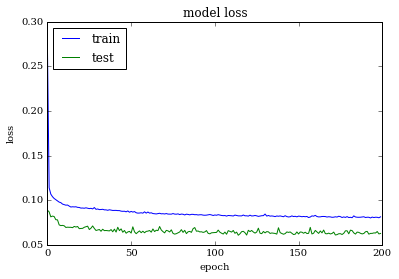

['loss', 'val_loss']


In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
f, ax2 = plt.subplots(1, 1)
# summarize history for loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

In [10]:
model.save("keras_model_tensorflow_ep_200.h5")

In [11]:
predicted_energy = model.predict(data_input_n)
print predicted_energy[:2]

[[ 1.08363438]
 [ 0.39684641]]


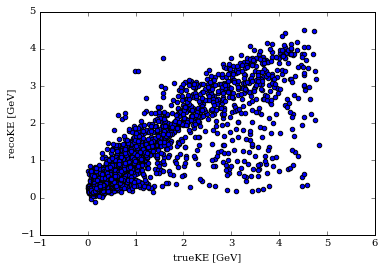

In [12]:
f, ax1 = plt.subplots(1, 1)
ax1.scatter(data_truth_n,predicted_energy)
ax1.set_xlabel("trueKE [GeV]")
ax1.set_ylabel("recoKE [GeV]")

In [13]:
chain = ROOT.TChain('nu_eneNEW')
for i in range(1040,1099):
    chain.Add('/Disk/ds-sopa-group/PPE/titus/ts-WChRecoSandBox/scripts/editing_ene/outputs/nu_numu_'+str(i)+'_CCQE_12in_energy_studies_recoquant_tree_NEWlookups.root')
test_data = tree2array(chain, branches=columns)

In [14]:
len(test_data)

20829

In [15]:
test_data_input = test_data[['total_hits2','total_ring_PEs2','recoDWallR2','recoDWallZ2','hits_pot_length2','lambda_max_2']]
test_data_truth = test_data[['trueKE']]
test_data_input_n = test_data_input.view(test_data_input.dtype[0]).reshape(test_data_input.shape + (-1,))
test_data_truth_n = test_data_truth.view(test_data_truth.dtype[0]).reshape(test_data_truth.shape + (-1,))/1e3

In [16]:
test_predicted_energy = model.predict(test_data_input_n)
test_predicted_energy.shape

(20829, 1)

(0, 2)

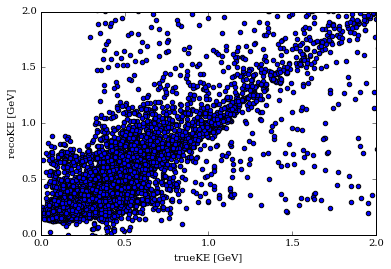

In [17]:
f, ax1 = plt.subplots(1, 1)
ax1.scatter(test_data_truth_n,test_predicted_energy)
ax1.set_xlabel("trueKE [GeV]")
ax1.set_ylabel("recoKE [GeV]")
ax1.set_ylim((0,2))
ax1.set_xlim((0,2))

In [18]:
test_predicted_energy

array([[ 0.9903481 ],
       [ 0.3141697 ],
       [ 0.29393619],
       ..., 
       [ 0.3662737 ],
       [ 0.33064494],
       [ 0.213176  ]], dtype=float32)

In [19]:
test_predicted_energy.shape

(20829, 1)

In [20]:
res_twod = np.hstack((test_data_truth_n, np.abs(test_predicted_energy-test_data_truth_n)/test_data_truth_n))
res_twod

array([[ 0.32463332,  2.05066683],
       [ 0.28393132,  0.10649892],
       [ 0.20387313,  0.44176036],
       ..., 
       [ 0.36780184,  0.00415478],
       [ 0.30308272,  0.09093957],
       [ 0.07328254,  1.90896044]])

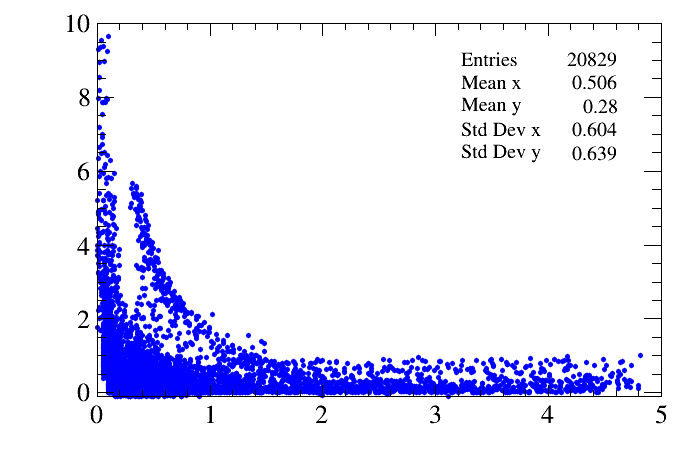

In [21]:
hist = ROOT.TH2D('name', 'title', 100, 0, 5, 100, -0.1, 10)
fill_hist(hist, res_twod)
c = ROOT.TCanvas()
hist.Draw()
c.Draw()

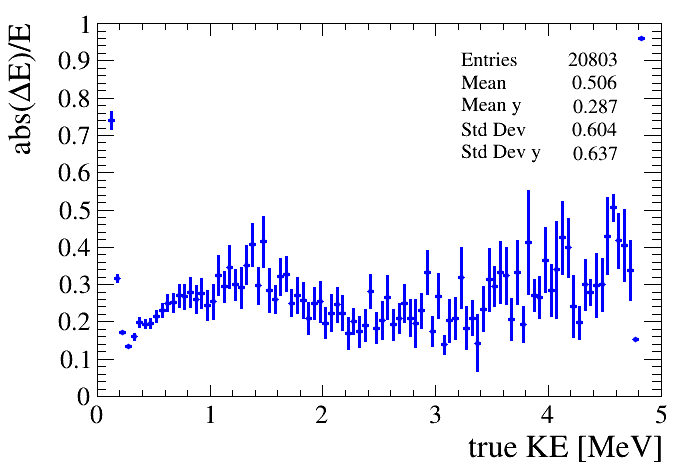

In [22]:
profile = hist.ProfileX()
profile.SetLineColor(ROOT.kBlue)
c1 = ROOT.TCanvas()
c1.SetLogy(0)
profile.SetMinimum(0)
profile.SetMaximum(1)
profile.GetXaxis().SetTitle('true KE [MeV]')
profile.GetYaxis().SetTitle('abs(#DeltaE)/E')
profile.Draw()
c1.Draw()